https://scikit-learn.org/stable/modules/grid_search.html#multimetric-grid-search 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from matplotlib.colors import ListedColormap

#from adspy_shared_utilities import plot_feature_importances
#from adspy_shared_utilities import plot_decision_tree
#from adspy_shared_utilities import plot_class_regions_for_classifier
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
#from adspy_shared_utilities import plot_fruit_knn

---
DIGITS
---
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

In [2]:
from sklearn import metrics
sorted(metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

---
Tuning: GridSearchCV
---

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scores = ["precision", "recall", "f1"]

for score in scores:
    print ("-----------------------------------------------------------------")
    print (score)
    print("# ...Tuning hyper-parameters for %s" % score)
    print()
    skf = StratifiedKFold(n_splits=10)
    clf = GridSearchCV(SVC(), tuned_parameters, 
                       cv = skf, 
                       scoring="%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

-----------------------------------------------------------------
precision
# ...Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.020) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.035) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.986 (+/-0.020) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.985 (+/-0.029) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.986 (+/-0.020) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.986 (+/-0.027) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.986 (+/-0.020) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.986 (+/-0.027) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.025) for {'C': 1, 'kernel': 'linear'}
0.980 (+/-0.025) for {'C': 10, 'kernel': 'linear'}
0.980 (+/-0.025) for {'C': 100, 'kernel': 'linear'}
0.980 (+/-0.025) for {'C': 1000, 'kernel': 'linear'}

Detailed classification rep

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

#scores = ["precision", "recall"]
scores = ["roc_auc"]



for score in scores:
    print ("-----------------------------------------------------------------")
    print (score)
    print("# ...Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), 
                       tuned_parameters, 
                       scoring= score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

-----------------------------------------------------------------
roc_auc
# ...Tuning hyper-parameters for roc_auc



/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score o

/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score o

/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score o

/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score o

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

nan (+/-nan) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
nan (+/-nan) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
nan (+/-nan) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
nan (+/-nan) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
nan (+/-nan) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
nan (+/-nan) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
nan (+/-nan) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
nan (+/-nan) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
nan (+/-nan) for {'C': 1, 'kernel': 'linear'}
nan (+/-nan) for {'C': 10, 'kernel': 'linear'}
nan (+/-nan) for {'C': 100, 'kernel': 'linear'}
nan (+/-nan) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

       

/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores 

    ACCURACY as a perf metric supports grid search for multiclass classification

    we need to mention the positive label!!!
    computing the precision without providing the positive label will not be supported by scikit-learn because it is indeed ambiguous

---
EVALUATION OF THE TUNED MODELS ==> CROSSVALIDATION
---

In [5]:
number_crossval_folds = 10
# f1 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
# recall {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
# precision {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
# roc_auc {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
clf = SVC(C= 1, 
          gamma=0.001,
          kernel = 'rbf')

cv_scores = cross_val_score(clf, 
                            X, y, 
                            cv= number_crossval_folds)

print ( str(number_crossval_folds) +" - fold")
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score: {:.3f}'
     .format(np.mean(cv_scores)))

10 - fold
Cross-validation scores: [0.95       1.         0.95       0.98333333 0.98888889 0.98888889
 0.99444444 0.99441341 0.96648045 0.96648045]
Mean cross-validation score: 0.978


In [6]:
clf = SVC(C= 10, 
          gamma=0.001,
          kernel = 'rbf',
          probability = True).fit(X_train, y_train)

predictions_digits = clf.predict(X_test)
confusion = confusion_matrix(y_test, 
                             predictions_digits)

print('SVC \n', confusion)

# Combined report with all  metrics
print(classification_report(y_test, 
                            predictions_digits
                           ))

SVC 
 [[ 89   0   0   0   0   0   0   0   0   0]
 [  0  90   0   0   0   0   0   0   0   0]
 [  0   1  90   0   0   0   0   1   0   0]
 [  0   0   1  92   0   0   0   0   0   0]
 [  0   0   0   0  76   0   0   0   0   0]
 [  0   0   0   0   0 106   1   0   0   1]
 [  0   0   0   0   0   0  89   0   0   0]
 [  0   0   0   0   0   0   0  78   0   0]
 [  0   2   0   0   0   0   0   0  90   0]
 [  0   0   0   0   0   1   0   0   0  91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.99      0.98      0.99       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.9

In [7]:
# predicted probability of class membership
y_proba_clf = clf.predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_clf[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(2, 0.001855866342480741),
 (8, 0.01074125276749913),
 (2, 0.0013960168761749977),
 (6, 0.008346164547601976),
 (6, 0.0018283871431440987),
 (7, 0.005546098376619694),
 (1, 0.9309169703195235),
 (9, 0.002469277184371242),
 (8, 0.0019100326887374437),
 (5, 0.0024646783563067815),
 (2, 0.00212102376948445),
 (8, 0.009987064112656178),
 (6, 0.0035569544136614005),
 (6, 0.0025494006850719404),
 (6, 0.008251025109463671),
 (6, 0.00687598349259031),
 (1, 0.940111585733224),
 (0, 0.0005986302906616144),
 (5, 0.0007159726637538578),
 (8, 0.0019141766293753269)]

In [8]:
y_scores_clf = clf.decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_clf[0:20]))
# show the decision_function scores for first 20 instances
y_score_list_df = pd.DataFrame(y_score_list)
y_score_list_df.columns = ["target", "decision function score"]
y_score_list_df.head()

,target,decision function score
0,2,"[0.7326241008157337, 3.8887060203671817, 9.303..."
1,8,"[-0.2677094458262501, 6.060988546736625, 3.923..."
2,2,"[-0.27668975717867306, 7.1697983794771485, 9.3..."
3,6,"[2.788215926906276, 3.836111452262903, 4.83835..."
4,6,"[5.903714253433877, 2.773869834105018, 3.81951..."


In [9]:
y_score_list_df.loc[0,:]["decision function score"]

array([ 0.7326241 ,  3.88870602,  9.30370285,  8.22636397,  1.75705419,
        2.79996809, -0.27717095,  5.9239037 ,  7.18833377,  5.07882683])

<IPython.core.display.Javascript object>


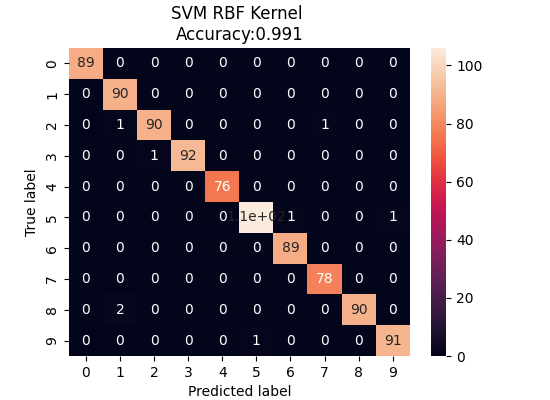

In [10]:
confusionmatrix_df = pd.DataFrame(confusion, 
                     index = [i for i in range(0,10)],
                     columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(confusionmatrix_df, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                    predictions_digits)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [11]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, predictions_digits, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, predictions_digits, average = 'macro')))

print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test, predictions_digits, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test, predictions_digits, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)
Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)
